# Problem Statement

1.Analyze the Data

2.Perform E.D.A

3.Predict for Test data that is on the basis of given features the
particular person is eligible for loan or not

# Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading Train dataset

In [21]:
traindf=pd.read_csv('train.csv')

In [22]:
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Getting basic and statistical information about our given dataset

In [23]:
traindf.shape

(614, 13)

In [24]:
traindf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [25]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
traindf.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [27]:
traindf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
traindf.duplicated().sum()

0

# Replacing Null values in our dataset using Mode and Mean

In [29]:
traindf['Gender'].fillna(traindf['Gender'].mode()[0],inplace=True)
traindf['Married'].fillna(traindf['Married'].mode()[0],inplace=True)
traindf['Dependents'].fillna(traindf['Dependents'].mode()[0],inplace=True)
traindf['Self_Employed'].fillna(traindf['Self_Employed'].mode()[0],inplace=True)
traindf['Credit_History'].fillna(traindf['Credit_History'].mode()[0],inplace=True)
traindf['Loan_Amount_Term'].fillna(traindf['Loan_Amount_Term'].mode()[0],inplace=True)
traindf['LoanAmount'].fillna(traindf['LoanAmount'].mean(),inplace=True)

In [30]:
traindf.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA

In [31]:
pd.crosstab(traindf['Credit_History'],traindf['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [32]:
pd.crosstab(traindf['Education'],traindf['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

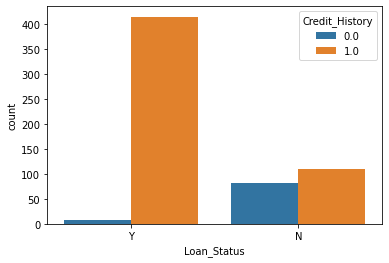

In [33]:
 sns.countplot(x='Loan_Status',data= traindf, hue='Credit_History')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

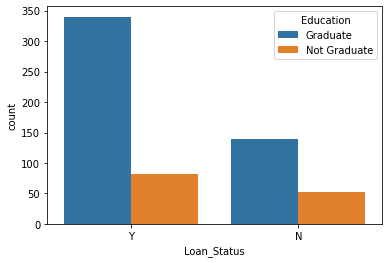

In [34]:
 sns.countplot(x='Loan_Status',data= traindf, hue='Education')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

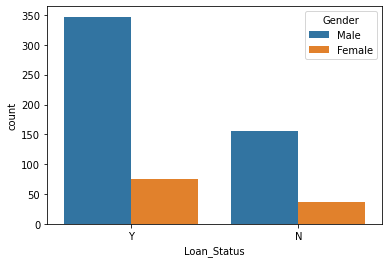

In [35]:
 sns.countplot(x='Loan_Status',data= traindf, hue='Gender')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

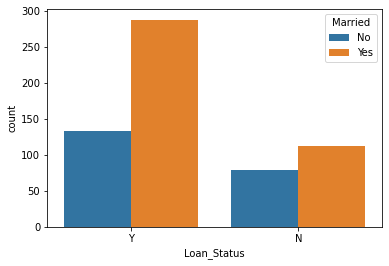

In [36]:
 sns.countplot(x='Loan_Status',data= traindf, hue='Married')

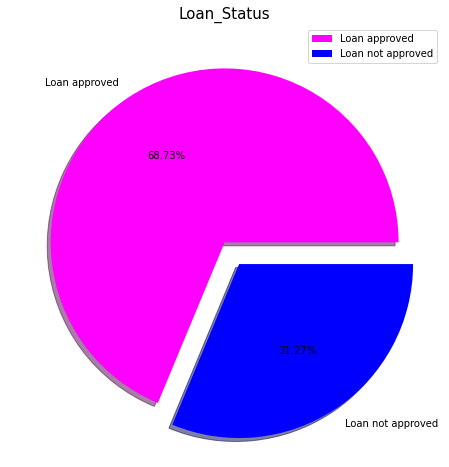

In [37]:
plt.figure(figsize=(8,8))
size = traindf['Loan_Status'].value_counts()
colors = ['magenta', 'blue']
plt.pie(size, colors = colors, explode = [0, 0.15],labels = ['Loan approved', 'Loan not approved'], shadow = True, autopct = '%.2f%%')
plt.title('Loan_Status', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

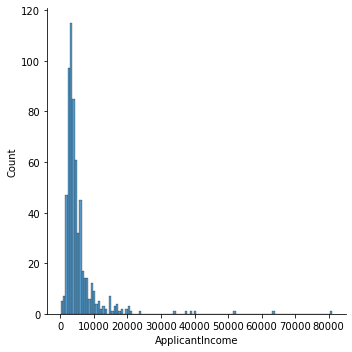

In [38]:
sns.displot(traindf['ApplicantIncome'])

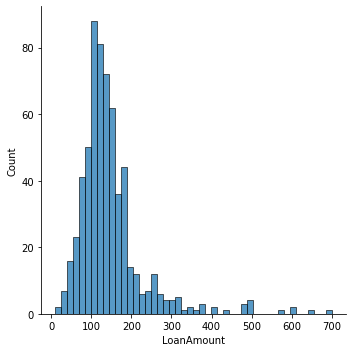

In [39]:
sns.displot(traindf['LoanAmount'])

# Using LabelEncoder to replace our categorical data into int

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in traindf.columns[1:]:
    if traindf[col].dtype == 'object':
        if len(list(traindf[col].unique())) <= 3:
            le.fit(traindf[col])
            traindf[col] = le.transform(traindf[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [41]:
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [42]:
traindf.Dependents=le.fit_transform(traindf.Dependents)

In [43]:
traindf.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [44]:
x=traindf.drop(['Loan_ID', 'Loan_Status'], axis=1)

In [45]:
y=traindf['Loan_Status']

In [46]:
col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [47]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x[col]=st.fit_transform(x[col])

# Splitting our data into Train and Test dataset

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,stratify=y, random_state=42)

In [49]:
x_train.shape, y_train.shape

((491, 11), (491,))

In [50]:
x_test.shape, y_test.shape

((123, 11), (123,))

# Logistic Regression

In [51]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x_train, y_train)

y_pred = LRclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

[[22 16]
 [ 1 84]]
LR accuracy: 86.18%


In [52]:
y_pred_df=pd.DataFrame({'actual':y_test,"predicted_y":y_pred})

In [53]:
y_pred_df

,actual,predicted_y
150,0,0
559,1,1
598,1,1
235,1,1
145,1,1
...,...,...
363,1,1
280,0,0
7,0,0
289,1,1


Text(0, 0.5, 'True Positive Rate')

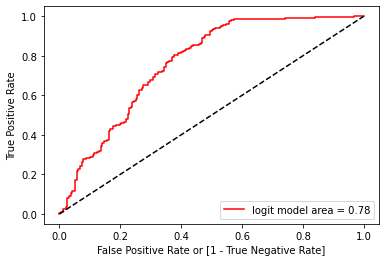

In [54]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, LRclassifier.predict_proba (x)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
#plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot(fpr, tpr, color='red', label='logit model area = %0.2f' % auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Decision Tree Classifier

In [55]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))
    DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

Decision Tree Accuracy: 86.18%


# Random Forest Classifier

In [56]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(x_train, y_train)
    scoreListRF.append(RFclassifier.score(x_test, y_test))
    RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

Random Forest Accuracy:  85.37%


In [57]:
compare = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest'], 
'Accuracy': [LRAcc*100,DTAcc*100,RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,86.178862
1,Decision Tree,86.178862
2,Random Forest,85.365854


# Logistic Regression is giving the best accuracy

# save the model

In [58]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(x, y)

LogisticRegression(max_iter=500, random_state=1, solver='saga')

In [59]:
import joblib

In [60]:
joblib.dump(LRclassifier,'loan_predict')

['loan_predict']

# Predict the Loan Status on given test dataset

In [61]:
testdf=pd.read_csv('test.csv')

In [62]:
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [63]:
testdf['Gender'].fillna(testdf['Gender'].mode()[0],inplace=True)
testdf['Married'].fillna(testdf['Married'].mode()[0],inplace=True)
testdf['Dependents'].fillna(testdf['Dependents'].mode()[0],inplace=True)
testdf['Self_Employed'].fillna(testdf['Self_Employed'].mode()[0],inplace=True)
testdf['Credit_History'].fillna(testdf['Credit_History'].mode()[0],inplace=True)
testdf['Loan_Amount_Term'].fillna(testdf['Loan_Amount_Term'].mode()[0],inplace=True)
testdf['LoanAmount'].fillna(testdf['LoanAmount'].mean(),inplace=True)

In [64]:
testx=testdf.drop(columns=['Loan_ID'],axis=1)

In [65]:
testx.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in testx.columns[1:]:
    if testx[col].dtype == 'object':
        if len(list(testx[col].unique())) <= 3:
            le.fit(testx[col])
            testx[col] = le.transform(testx[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [67]:
testx['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [68]:
testx.Dependents=le.fit_transform(testx.Dependents)
testx.Gender=le.fit_transform(testx.Gender)

In [69]:
testx.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


In [70]:
col1=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [71]:
st= StandardScaler()
testx[col1]=st.fit_transform(testx[col1])

In [72]:
testpred=LRclassifier.predict(testx)

In [73]:
testpred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [74]:
testdf['Loan_Status'] = testpred

In [75]:
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,1
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [76]:
testdf.to_excel('finaltestresult.xlsx', index=False)